In [15]:
from google_play_scraper import search, app
import pandas as pd
from tqdm import tqdm
import time
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

CATEGORIES = {
    'GAME': 'GAME',
    'SOCIAL': 'SOCIAL',
    'PHOTOGRAPHY': 'PHOTOGRAPHY',
    'MUSIC_AND_AUDIO': 'MUSIC_AND_AUDIO',
    'VIDEO_PLAYERS': 'VIDEO_PLAYERS',
    'ENTERTAINMENT': 'ENTERTAINMENT',
    'COMMUNICATION': 'COMMUNICATION',
    'EDUCATION': 'EDUCATION',
    'BOOKS_AND_REFERENCE': 'BOOKS_AND_REFERENCE',
    'BUSINESS': 'BUSINESS',
    'PRODUCTIVITY': 'PRODUCTIVITY',
    'FINANCE': 'FINANCE',
    'HEALTH_AND_FITNESS': 'HEALTH_AND_FITNESS',
    'LIFESTYLE': 'LIFESTYLE',
    'SHOPPING': 'SHOPPING',
    'SPORTS': 'SPORTS',
    'NEWS_AND_MAGAZINES': 'NEWS_AND_MAGAZINES',
    'TRAVEL_AND_LOCAL': 'TRAVEL_AND_LOCAL',
    'WEATHER': 'WEATHER'
}

def get_top_apps_by_category(category, n_hits=100):
    """
    Fetch top apps for a specific category
    """
    app_ids = set()
    try:
        results = search(
            category,
            lang='en',
            country='us',
            n_hits=n_hits
        )
        for result in results:
            app_ids.add(result['appId'])
        time.sleep(0.3)
    except Exception as e:
        print(f"Error searching category {category}: {e}")
    return app_ids

def get_app_details(app_id):
    """
    Fetch detailed information for a specific app
    """
    try:
        details = app(app_id, lang='en', country='us')
        return {
            'app_name': details.get('title'),
            'app_id': app_id,
            'category': details.get('genre'),
            'score': details.get('score'),
            'ratings': details.get('ratings'),
            'downloads': details.get('installs'),
            'description': details.get('description'),
            'developer': details.get('developer'),
            'released': details.get('released'),
            'lastUpdated': details.get('updated'),
            'price': details.get('price'),
            'free': details.get('free'),
            'summary': details.get('summary')
        }
    except Exception as e:
        print(f"Error fetching details for {app_id}: {e}")
        return None

def main():
    selected_categories = [
        # Entertainment & Media
        'GAME',
        'ENTERTAINMENT',
        'MUSIC_AND_AUDIO',
        'VIDEO_PLAYERS',
        'PHOTOGRAPHY',
        
        # Social & Communication
        'SOCIAL',
        'COMMUNICATION',
        'DATING',
        
        # Productivity & Tools
        'PRODUCTIVITY',
        'TOOLS',
        'BUSINESS',
        
        # Education & Reference
        'EDUCATION',
        'BOOKS_AND_REFERENCE',
        'LIBRARIES_AND_DEMO',
        
        # Lifestyle & Health
        'LIFESTYLE',
        'HEALTH_AND_FITNESS',
        'FOOD_AND_DRINK',
        'MEDICAL',
        'BEAUTY',
        
        # Finance & Shopping
        'FINANCE',
        'SHOPPING',
        
        # Travel & Local
        'TRAVEL_AND_LOCAL',
        'MAPS_AND_NAVIGATION',
        'WEATHER',
        
        # News & Information
        'NEWS_AND_MAGAZINES',
        'EVENTS',
        
        # Personalization & Customization
        'PERSONALIZATION',
        'ART_AND_DESIGN',
        
        # Special Interest
        'SPORTS',
        'AUTO_AND_VEHICLES',
        'HOUSE_AND_HOME',
        'COMICS',
        
        # Family & Kids
        'FAMILY',
        'PARENTING'
    ]
    
    app_details = []

    for category in tqdm(selected_categories, desc="Processing categories"):
        # print(f"\nProcessing category: {category}")
        
        app_ids = get_top_apps_by_category(category)
        
        for app_id in tqdm(app_ids, desc=f"Fetching apps in {category}", leave=False):
            details = get_app_details(app_id)
            if details:
                app_details.append(details)
            time.sleep(0.3)

    df = pd.DataFrame(app_details)
    df.to_csv('top_apps_by_category.csv', index=False)
    print(f"\nTotal apps processed: {len(df)}")
    print(f"Data saved to 'top_apps_by_category.csv'")

if __name__ == "__main__":
    main()

Processing categories: 100%|██████████| 34/34 [17:00<00:00, 30.02s/it]


Total apps processed: 859
Data saved to 'top_apps_by_category.csv'


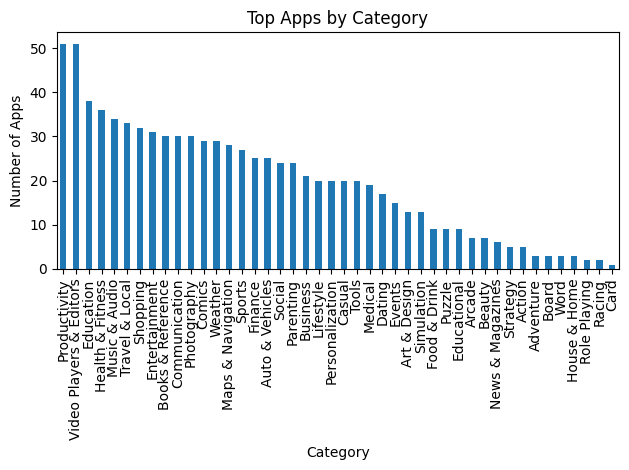

In [21]:
df = pd.read_csv('top_apps_by_category.csv')
df['category'].value_counts().plot(kind='bar')

import matplotlib.pyplot as plt
plt.title('Top Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
from google_play_scraper import search, app
import pandas as pd
from tqdm import tqdm
import time
import ssl
import certifi
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

keywords = ['game', 'music', 'photo', 'video', 'chat']#, 'news', 'fitness', 'education', 'finance', 'shopping']
app_ids = set()

for keyword in tqdm(keywords, desc="Searching for apps", total=len(keywords)):
    # print(f"Searching for apps with keyword: {keyword}")
    results = search(keyword, lang='en', country='us', n_hits=100)
    for result in results:
        app_ids.add(result['appId'])
        # print(f"Found app: {result['title']} with ID: {result['appId']}")
    time.sleep(1)

app_details = []

for app_id in tqdm(app_ids, desc="Fetching app details", unit="app", total=len(app_ids)):
    try:
        # print(f"Fetching details for {app_id}")
        details = app(app_id, lang='en', country='us')
        app_details.append({
            'app_name': details.get('title'),
            'keywords': details.get('summary'),
            'categories': details.get('genre'),
            'description': details.get('description')
        })
        time.sleep(1)
    except Exception as e:
        print(f"Error fetching details for {app_id}: {e}")

df = pd.DataFrame(app_details)
df.to_csv('top_apps.csv', index=False)


Fetching app details: 100%|██████████| 148/148 [04:34<00:00,  1.85s/app]
